<center><h1>ML project on KNN</h1> </center>

<center><h4> Project By: Swati Tripathi</h4> </center>

________________________________________________________________________________________________________________________________

# KNN Algorithm - Finding Nearest Neighbors 
## Dataset used :Red Wine Quality

________________________________________________________________________________________________________________________________

> This notebook is divided into two parts A and B which shows two different ways of implementing KNN <br>
<b>PART A<b>: Implementation from scratch<br>
<b>PART B<b>: Implementation using scikit-learn <br> 

In [1]:
import numpy as np 
import pandas as pd

### DETAILS ABOUT THE RED WINE QUALITY DATASET

In [2]:
reddata = pd.read_csv('redwine.csv')

In [3]:
reddata

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df = reddata
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
reddata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
gb = reddata.groupby('quality')
print(gb.first())

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                 11.6              0.58         0.66             2.2   
4                  7.4              0.59         0.08             4.4   
5                  7.4              0.70         0.00             1.9   
6                 11.2              0.28         0.56             1.9   
7                  7.3              0.65         0.00             1.2   
8                  7.9              0.35         0.46             3.6   

         chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
quality                                                                        
3            0.074                 10.0                  47.0   1.0008  3.25   
4            0.086                  6.0                  29.0   0.9974  3.38   
5            0.076                 11.0                  34.0   0.9978  3.51   
6            0.

In [8]:
print(reddata['quality'].head())

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64


### Let us see the steps for implementing KNN
Steps given are: 
1. <b>Handle Data:</b> Open the dataset from CSV and split into test/train datasets.
2. <b>Similarity:</b> Calculate the distance between two data instances.
3. <b>Neighbors:</b> Locate k most similar data instances.
4. <b>Response:</b> Generate a response from a set of data instances.
5. <b>Accuracy:</b> Summarize the accuracy of predictions.
6. <b>Main:</b> Tie it all together.




## PART A: Implementation from scratch

>

In [1]:
import csv
import random
import math
import operator

In [2]:
## only in order to do feature scaling we are using scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
sc1 = MinMaxScaler()
sc2 = StandardScaler()

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
	with open(filename, 'r') as csvfile:
	    lines = csv.reader(csvfile)
	    dataset = list(lines)
	    for x in dataset[1:]:
	        if float(x[-1]) >6.5:
	            x[-1] = 1
	        else: 
	            x[-1] = 0
	    for x in range(1,len(dataset)-1):
	        for y in range(11):
	            dataset[x][y] = float(dataset[x][y])
	        if random.random() < split:
	            trainingSet.append(dataset[x])
	        else:
	            testSet.append(dataset[x])


def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)

def chebyshevDistance(instance1, instance2, length):
	distance = []
	for x in range(length):
		#distance += pow((instance1[x] - instance2[x]), 2)
		distance.append(abs(instance1[x] - instance2[x]))
	return max(distance)

def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors

def getNeighborsWithchebyshev(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = chebyshevDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors

def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0
	
def main():
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.67
    loadDataset('redwine.csv', split, trainingSet, testSet)
    print('Train set: %d' % len(trainingSet))
    print('Test set: %d' % len(testSet))
    predictions=[]
    k = 3
    print("Here we have taken : K=3  ")
    
    ## ACCURACY BEFORE FEATURE SCALING 
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy before feature scaling is done: ' + str(accuracy) + '%')
    
    ## ACCURACY AFTER FEATURE SCALING 
    
    ## ACCURACY AFTER MinMax way of scaling was done
    trainingSet=[]
    testSet=[]
    predictions=[]
    loadDataset('redwine.csv', split, trainingSet, testSet)
    trainingSet = sc1.fit_transform(trainingSet)
    testSet = sc1.transform(testSet)
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy after Min-Max scaler was used for feature scaling: ' + str(accuracy) + '%')
    
    ## ACCURACY AFTER StandardScaler was used for scaling
    trainingSet=[]
    testSet=[]
    predictions=[]
    loadDataset('redwine.csv', split, trainingSet, testSet)
    trainingSet = sc2.fit_transform(trainingSet)
    testSet = sc2.transform(testSet)
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy after StandardScaler was used for feature scaling: ' + str(accuracy) + '%')
   

    ## ACCURACY after chebyshev distance is used
    trainingSet=[]
    testSet=[]
    predictions=[]
    loadDataset('redwine.csv', split, trainingSet, testSet)
    trainingSet = sc2.fit_transform(trainingSet)
    testSet = sc2.transform(testSet)
    for x in range(len(testSet)):
        neighbors = getNeighborsWithchebyshev(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy after we use chebyshev distance formula: ' + str(accuracy) + '%')
   
    
main()

Train set: 1091
Test set: 507
Here we have taken : K=3  
Accuracy before feature scaling is done: 83.62919132149902%
Accuracy after Min-Max scaler was used for feature scaling: 86.80688336520076%
Accuracy after StandardScaler was used for feature scaling: 85.15769944341372%
Accuracy after we use chebyshev distance formula: 84.5703125%


In [12]:
def collectallaccuracy(k):
   
    trainingSet=[]
    testSet=[]
    split = 0.67
    loadDataset('redwine.csv', split, trainingSet, testSet)
    trainingSet = sc2.fit_transform(trainingSet)
    testSet = sc2.transform(testSet)
   
    predictions=[]
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
    accur = getAccuracy(testSet, predictions)
    return accur

In [13]:
Accuracies = []
print('Let us see when standardScaler is used for feature scaling and euclidean distance is used \nthen for different k what is the respective accuracy we obtain')
print()
print('For different K its accuracy is : ')

for i in range(1, 21):
        val = collectallaccuracy(i)
        Accuracies.append(val)
        print('K = '+str(i)+' Accuracy = '+str(val))

Let us see when standardScaler is used for feature scaling and euclidean distance is used 
then for different k what is the respective accuracy we obtain

For different K its accuracy is : 
K = 1 Accuracy = 88.63636363636364
K = 2 Accuracy = 87.31060606060606
K = 3 Accuracy = 86.29629629629629
K = 4 Accuracy = 89.66861598440545
K = 5 Accuracy = 88.92733564013841
K = 6 Accuracy = 87.97709923664122
K = 7 Accuracy = 86.06060606060606
K = 8 Accuracy = 85.76779026217228
K = 9 Accuracy = 85.30534351145039
K = 10 Accuracy = 85.9344894026975
K = 11 Accuracy = 86.0377358490566
K = 12 Accuracy = 88.27977315689981
K = 13 Accuracy = 86.58318425760287
K = 14 Accuracy = 87.81431334622823
K = 15 Accuracy = 88.34244080145719
K = 16 Accuracy = 89.41176470588236
K = 17 Accuracy = 87.81431334622823
K = 18 Accuracy = 87.62475049900199
K = 19 Accuracy = 87.72563176895306
K = 20 Accuracy = 88.13868613138686


In [14]:
print("Max Accuracy we get is = "+str(max(Accuracies))+" at k = "+ str(Accuracies.index(max(Accuracies))+1))

Max Accuracy we get is = 89.66861598440545 at k = 4


>

>

>

>


>

>

>

Text(0, 0.5, 'Accuracy')

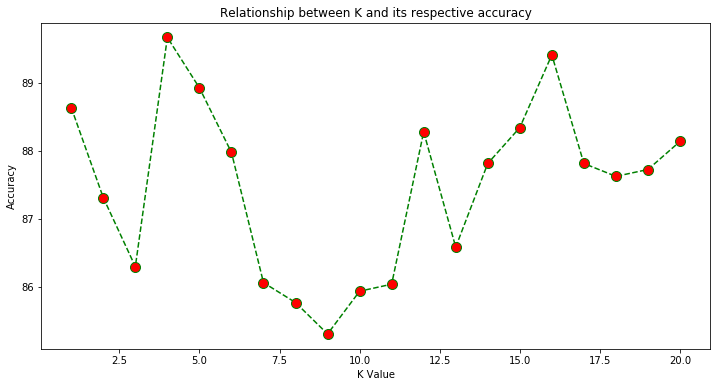

In [15]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21),  Accuracies, color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Relationship between K and its respective accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

___




## PART B: Implementation using scikit-learn

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np 
import pandas as pd

In [22]:
redwine = pd.read_csv('redwine.csv')
df = redwine.copy()

In [23]:
df['quality'] = [1 if x>6.5 else 0 for x in df['quality']]
y = df["quality"]
X = df.drop("quality", axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40, stratify=y)

In [24]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.878125

In [25]:
knn_cv = GridSearchCV(KNeighborsClassifier(), {"n_neighbors": np.arange(1,50)}, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
print("Best score is:" + str(knn_cv.best_score_),"and Best params is: " + str(knn_cv.best_params_))

Best score is:0.8694266732283464 and Best params is: {'n_neighbors': 2}


In [28]:
knn = KNeighborsClassifier(2)
knn_tuned = knn.fit(X_train, y_train)

In [29]:
knn_tuned.score(X_test, y_test)

0.896875